In [4]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data=pd.read_csv('train.csv')
data.head()

,Unnamed: 0,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE,TAVG
0,0,01-11-1979,63.88,77.52,128,NaN,0.0,17.6,NaN,12.96,...,78.93,64,0.0,0.00,18.7,NaN,NaN,63.933,78.733,9.3
1,1,13-11-1979,63.88,77.52,128,NaN,0.0,8.8,NaN,0.00,...,78.93,64,0.0,0.00,11.0,-3.8,2.04,63.933,78.733,2.7
2,2,05-02-1980,63.88,77.52,128,NaN,0.0,-9.9,NaN,-17.76,...,78.93,64,0.0,0.00,NaN,NaN,-16.56,63.933,78.733,-16.0
3,3,23-12-1979,63.88,77.52,128,0.0,0.0,NaN,-4.30,-4.44,...,78.93,64,0.0,0.00,0.0,NaN,-2.64,63.933,78.733,-3.2
4,4,07-06-1977,63.88,77.52,128,NaN,0.0,39.6,15.48,NaN,...,78.93,64,NaN,3.82,38.5,17.1,33.00,63.933,78.733,27.3


In [6]:
data['PRCP_A'].unique()

array([ nan,   0.,  10.,   3.,  89.,  15.,   5., 119.,  61.,  30.,  51.,
        20., 180., 500.,  41., 239.])

In [7]:
data=data.drop(['Unnamed: 0','LATITUDE','LONGITUDE','LATITUDE_A','LONGITUDE_A','ELEVATION_A','LATITUDE_B','LONGITUDE_B','ELEVATION_B','LATITUDE_C','LONGITUDE_C','ELEVATION_C'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    812 non-null    object 
 1   PRCP_A  251 non-null    float64
 2   SNWD_A  812 non-null    float64
 3   TMAX_A  567 non-null    float64
 4   TMIN_A  289 non-null    float64
 5   TAVG_A  742 non-null    float64
 6   PRCP_B  812 non-null    int64  
 7   SNWD_B  812 non-null    float64
 8   TMAX_B  812 non-null    float64
 9   TMIN_B  812 non-null    float64
 10  TAVG_B  742 non-null    float64
 11  PRCP_C  605 non-null    float64
 12  SNWD_C  812 non-null    float64
 13  TMAX_C  573 non-null    float64
 14  TMIN_C  341 non-null    float64
 15  TAVG_C  683 non-null    float64
 16  TAVG    812 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 108.0+ KB


In [9]:
data["DATE"].unique()

array(['01-11-1979', '13-11-1979', '05-02-1980', '23-12-1979',
       '07-06-1977', '03-12-1978', '05-01-1980', '04-12-1976',
       '12-04-1978', '21-11-1976', '25-10-1978', '15-03-1980',
       '02-09-1977', '31-07-1980', '23-04-1977', '03-01-1980',
       '25-03-1978', '24-09-1978', '30-06-1979', '05-04-1978',
       '12-04-1979', '31-03-1976', '28-12-1975', '28-09-1978',
       '22-11-1976', '16-12-1976', '19-02-1979', '11-08-1979',
       '17-12-1976', '23-11-1979', '04-04-1977', '18-06-1976',
       '23-08-1978', '31-01-1979', '14-10-1977', '09-01-1978',
       '07-10-1978', '17-03-1980', '11-11-1975', '20-12-1979',
       '01-02-1977', '07-04-1979', '05-12-1978', '30-07-1980',
       '07-12-1975', '21-12-1975', '28-03-1975', '12-07-1976',
       '02-05-1979', '29-11-1978', '08-07-1979', '02-06-1980',
       '01-05-1979', '12-02-1980', '23-02-1977', '23-02-1978',
       '08-01-1980', '17-07-1977', '10-04-1979', '18-07-1978',
       '13-09-1976', '28-02-1977', '09-04-1979', '27-10

In [10]:
unique_dates_count = data['DATE'].nunique()
print(f"Number of unique dates: {unique_dates_count}")

Number of unique dates: 812


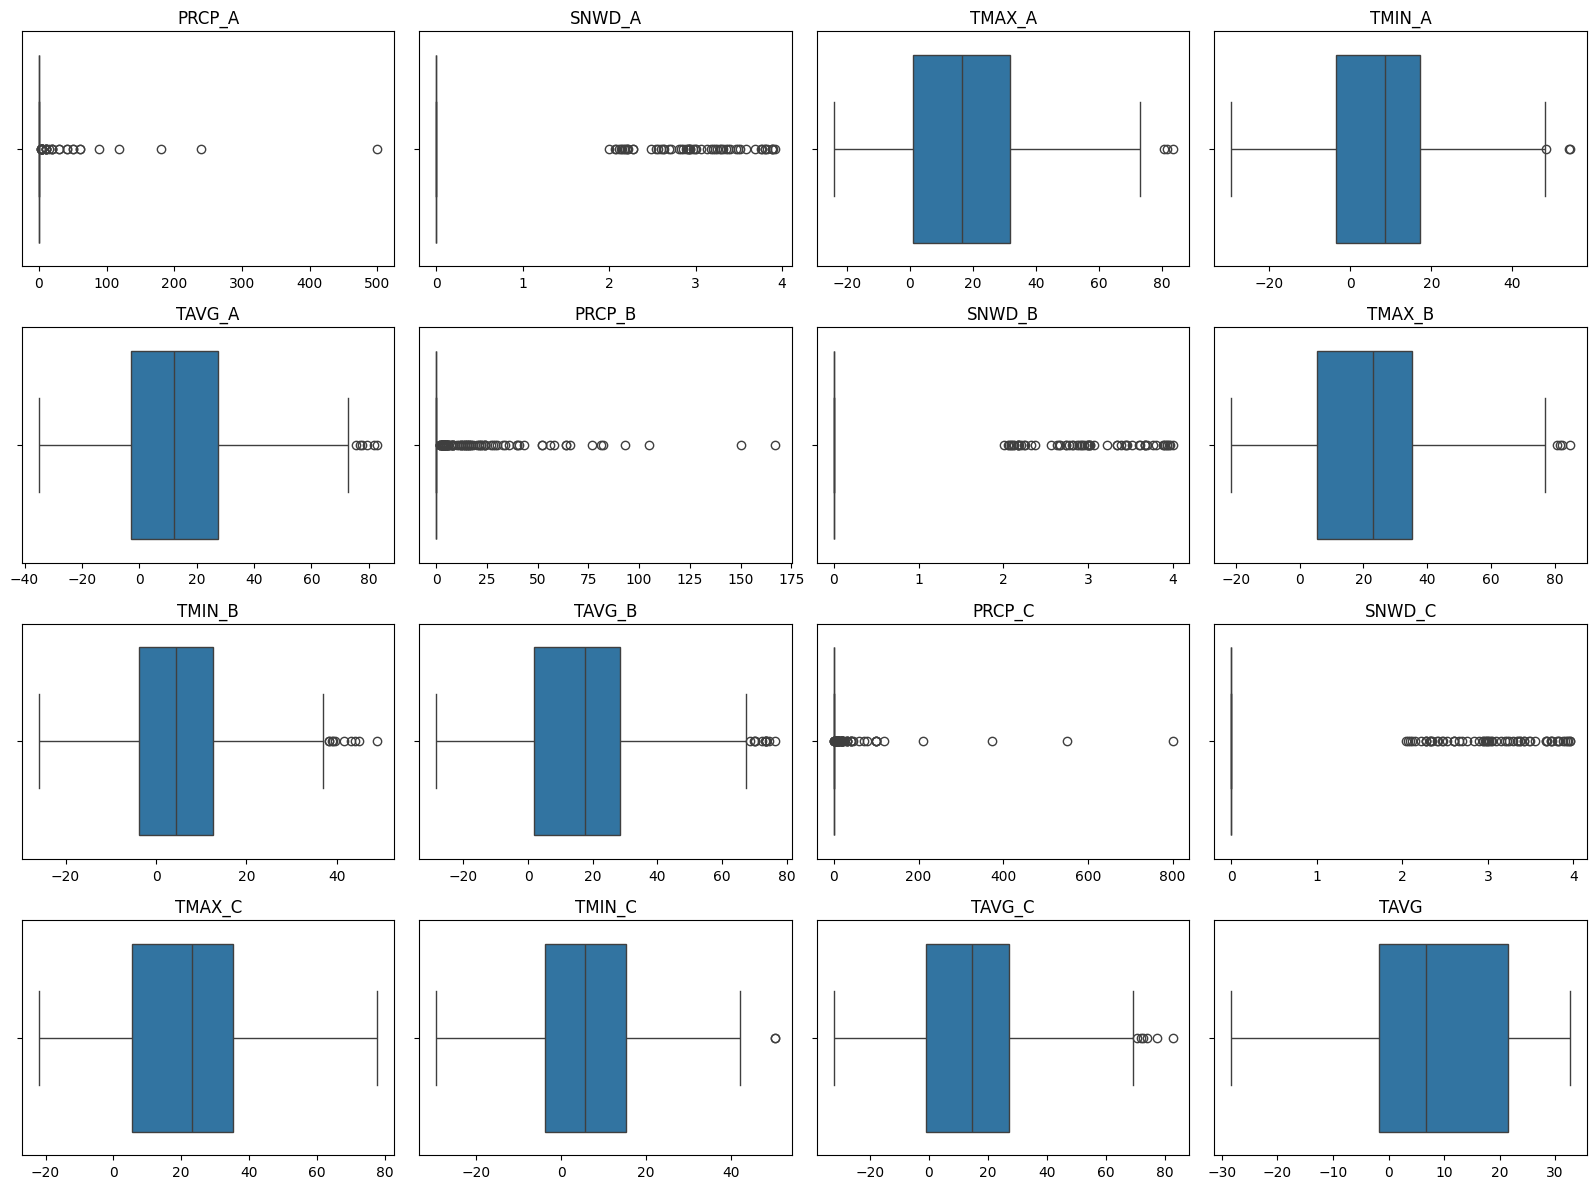

In [11]:
plt.figure(figsize=(16, 12))
X = data.drop(columns=['DATE'])
feature_columns = X.columns


for index, feature_name in enumerate(feature_columns, 1):
    plt.subplot(4, 4, index)
    sns.boxplot(x=X[feature_name])
    plt.title(f'{feature_name}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [12]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

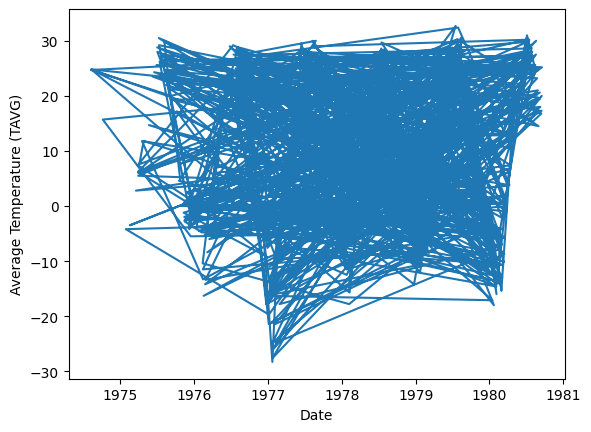

In [13]:
import matplotlib.pyplot as plt
plt.plot(data['DATE'], data['TAVG'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.show()

This indicates all the randomness between the plots indicating no trends or correlation.

In [14]:
data=data.drop(['DATE'],axis=1)

In [15]:
data_cleaned = data.dropna()

In [16]:
print(data_cleaned.isnull().sum())

PRCP_A    0
SNWD_A    0
TMAX_A    0
TMIN_A    0
TAVG_A    0
PRCP_B    0
SNWD_B    0
TMAX_B    0
TMIN_B    0
TAVG_B    0
PRCP_C    0
SNWD_C    0
TMAX_C    0
TMIN_C    0
TAVG_C    0
TAVG      0
dtype: int64


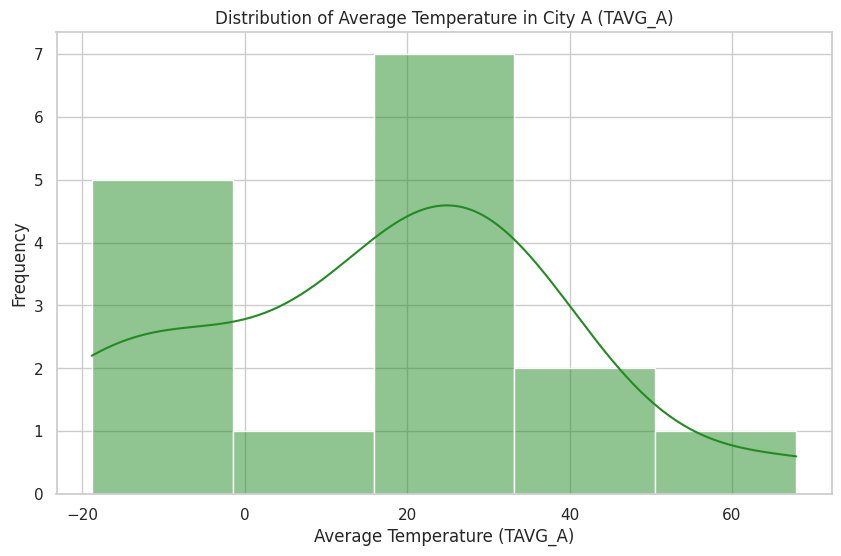

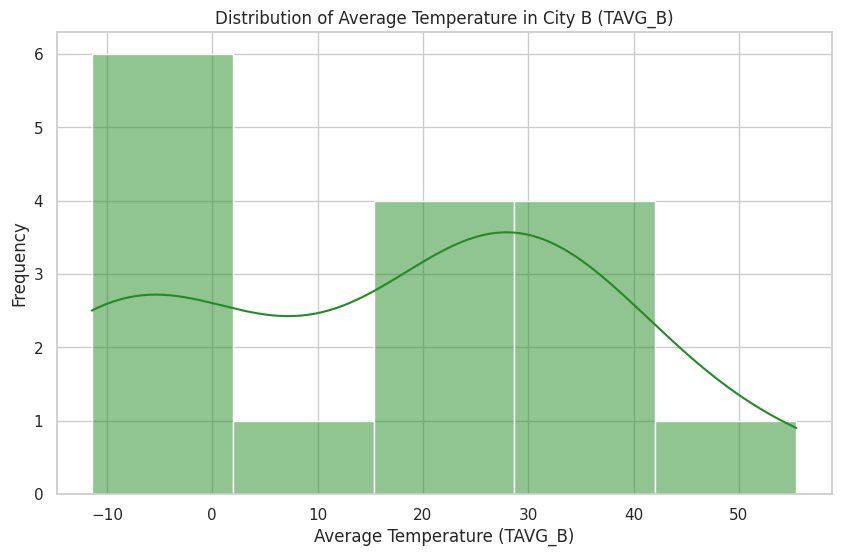

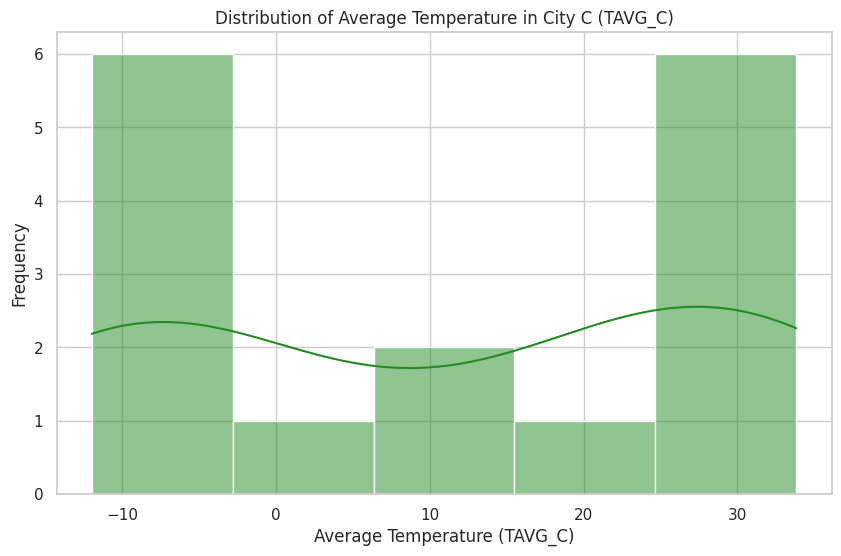

In [17]:
# Plot for TAVG_A
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_A'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City A (TAVG_A)')
plt.xlabel('Average Temperature (TAVG_A)')
plt.ylabel('Frequency')
plt.show()

# Plot for TAVG_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_B'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City B (TAVG_B)')
plt.xlabel('Average Temperature (TAVG_B)')
plt.ylabel('Frequency')
plt.show()

# Plot for TAVG_C
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_C'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City C (TAVG_C)')
plt.xlabel('Average Temperature (TAVG_C)')
plt.ylabel('Frequency')
plt.show()

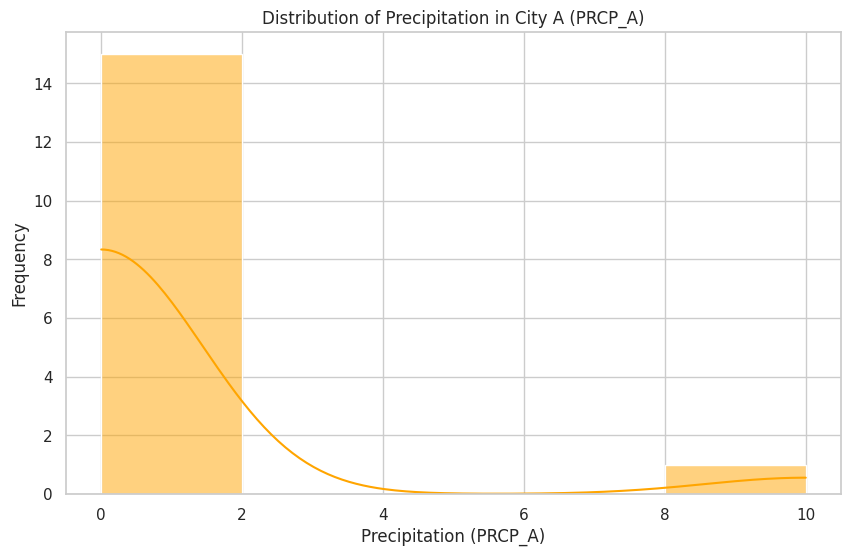

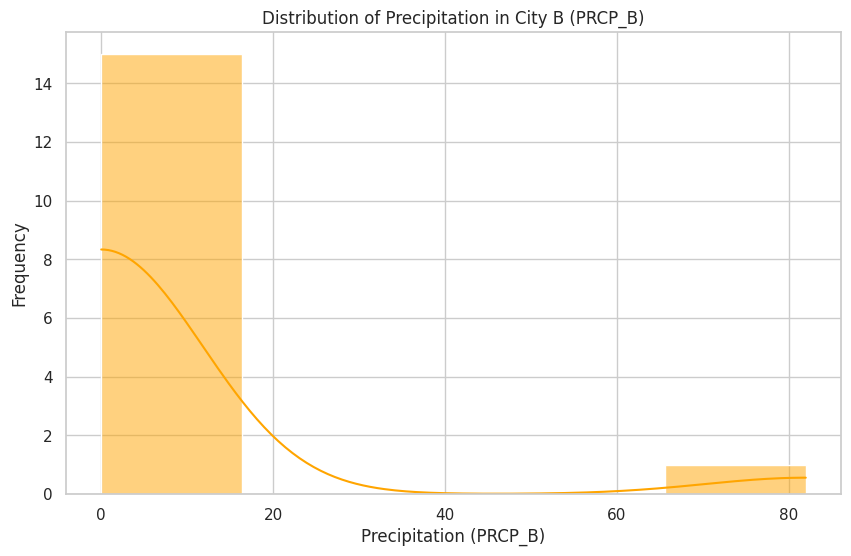

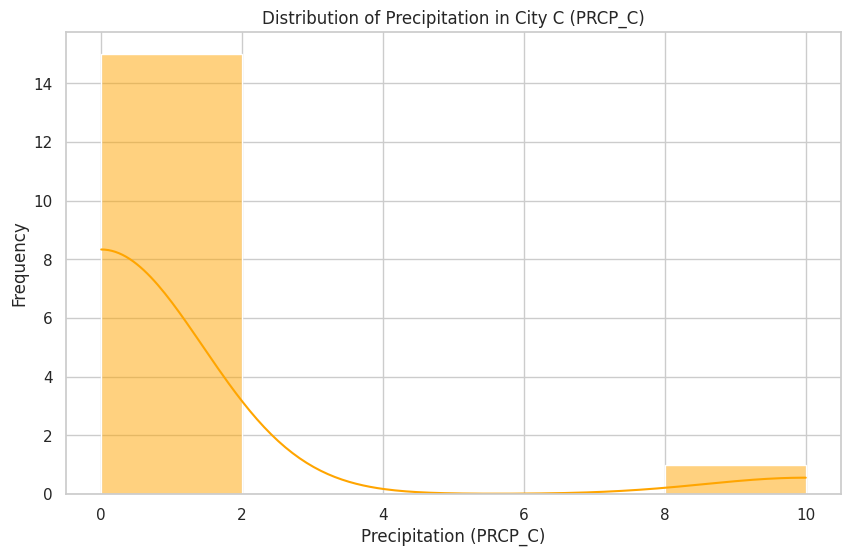

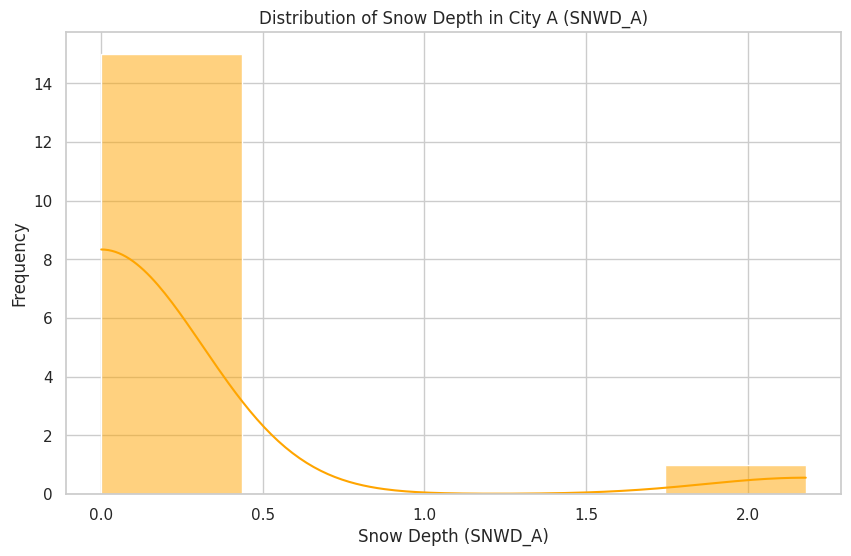

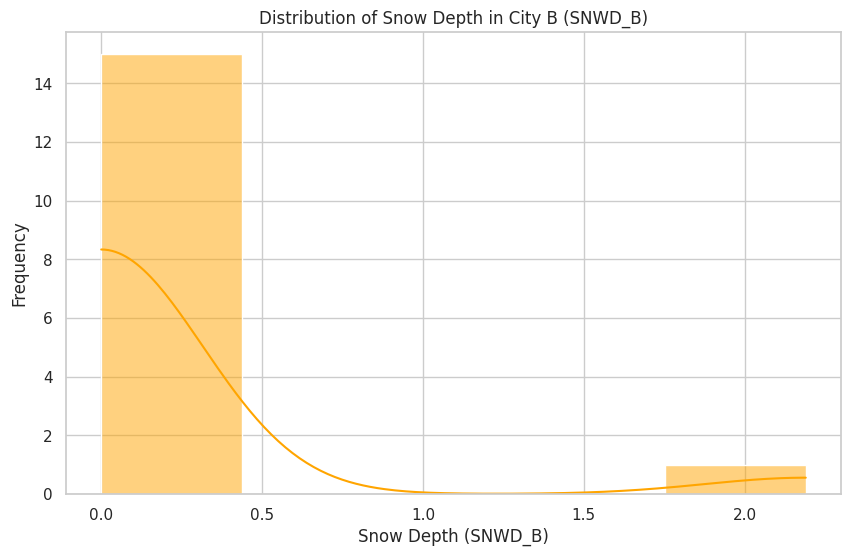

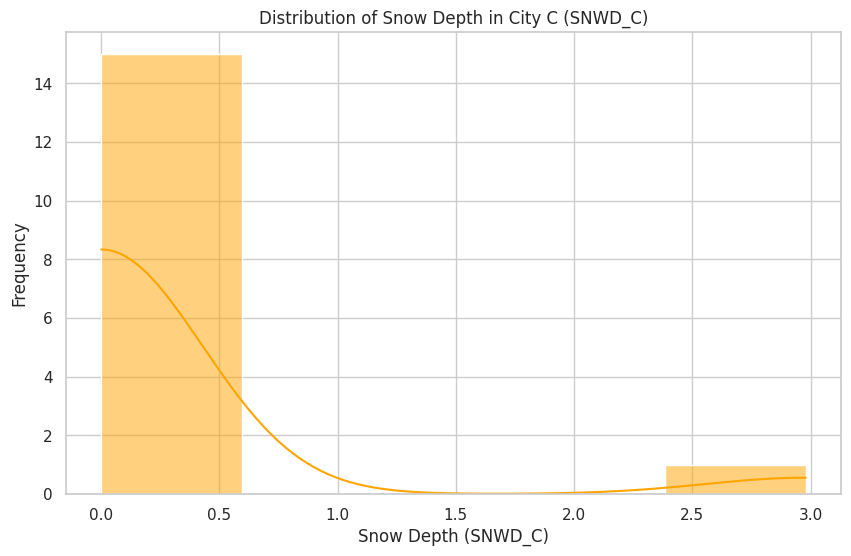

In [18]:
# Plot for PRCP_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_A'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City A (PRCP_A)')
plt.xlabel('Precipitation (PRCP_A)')
plt.ylabel('Frequency')
plt.show()


# Plot for PRCP_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_B'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City B (PRCP_B)')
plt.xlabel('Precipitation (PRCP_B)')
plt.ylabel('Frequency')
plt.show()



# Plot for PRCP_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_C'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City C (PRCP_C)')
plt.xlabel('Precipitation (PRCP_C)')
plt.ylabel('Frequency')
plt.show()

# Plot for SNWD_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_A'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City A (SNWD_A)')
plt.xlabel('Snow Depth (SNWD_A)')
plt.ylabel('Frequency')
plt.show()


# Plot for SNWD_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_B'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City B (SNWD_B)')
plt.xlabel('Snow Depth (SNWD_B)')
plt.ylabel('Frequency')
plt.show()



# Plot for SNWD_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_C'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City C (SNWD_C)')
plt.xlabel('Snow Depth (SNWD_C)')
plt.ylabel('Frequency')
plt.show()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


num_features = data_cleaned.columns
cat_features = []
all_features = data_cleaned.columns.tolist()


num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


preprocessor = ColumnTransformer(transformers=[
    ('num', num_imputer, num_features),
    ('cat', cat_imputer, cat_features)
])

imputed_data = preprocessor.fit_transform(data_cleaned)
data_cleaned = pd.DataFrame(imputed_data, columns=all_features)

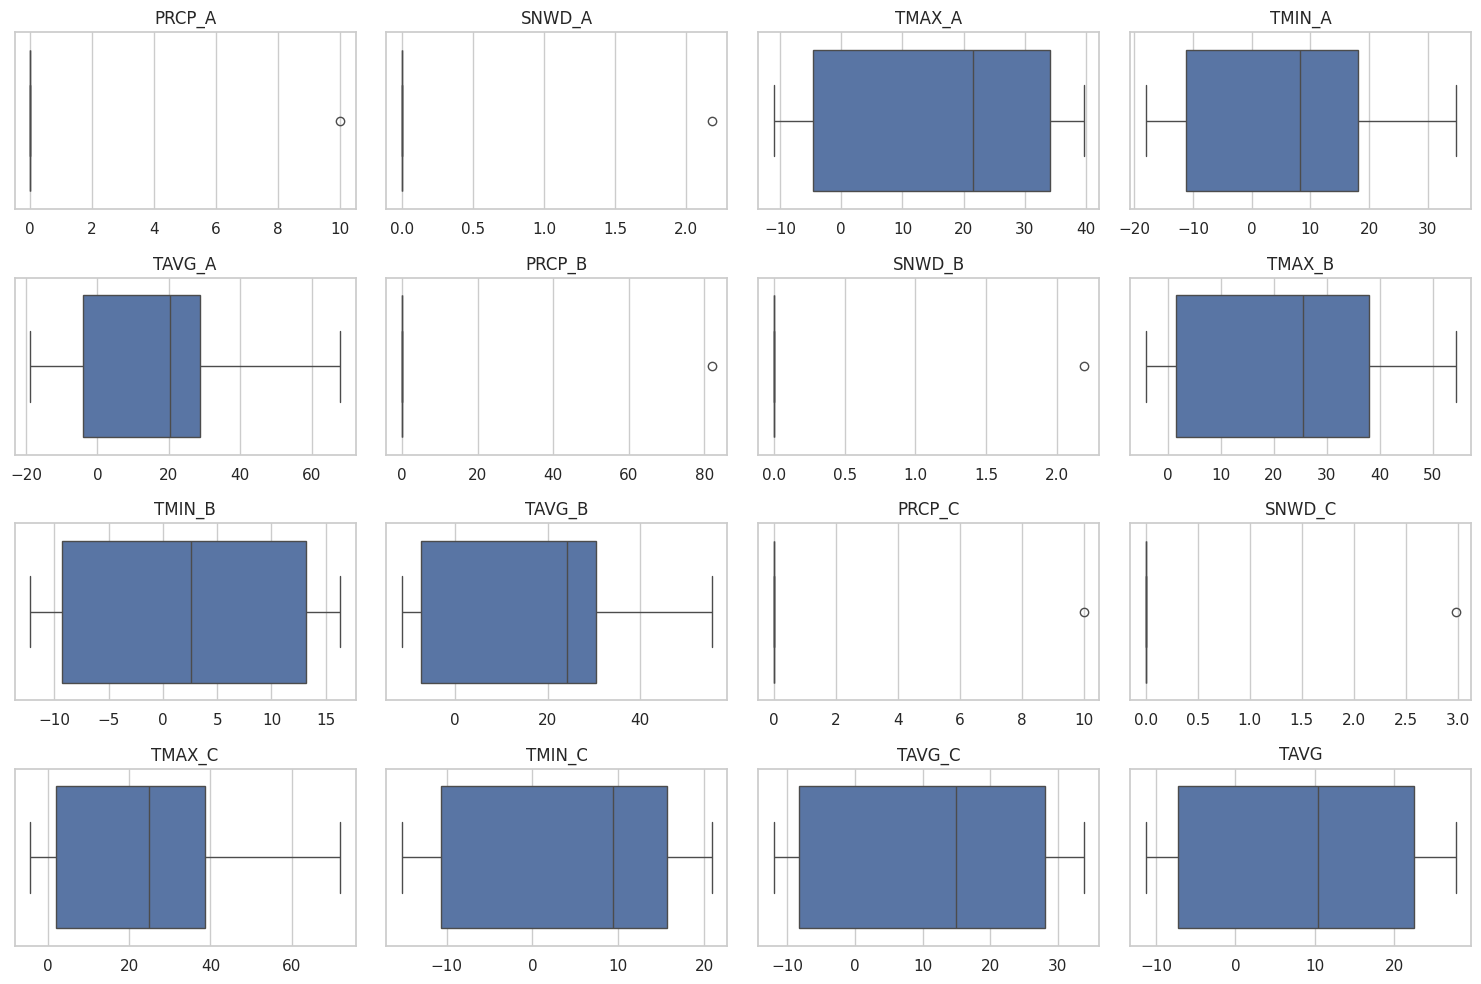

In [20]:
plt.figure(figsize=(15, 10))
X=data_cleaned
features=X.columns
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=X[feature])
    plt.title(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [23]:
Q1 = data_cleaned['PRCP_A'].quantile(0.25)
Q3 = data_cleaned['PRCP_A'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = data_cleaned[data_cleaned['PRCP_A'] > upper_bound]
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Outlier values:\n{outliers['PRCP_A'].sort_values(ascending=False)}")

Number of outliers: 1
Outlier values:
1    10.0
Name: PRCP_A, dtype: float64


In [25]:
def outlier_removal(df):
    cleaned_df = df.copy()
    num_cols = df.select_dtypes(include=[np.number]).columns

    for col in num_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR


        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_limit) & (cleaned_df[col] <= upper_limit)]

    return cleaned_df


numeric_df = data_cleaned.select_dtypes(include=[np.number])


df_without_outliers = outlier_removal(numeric_df)

print("DataFrame after removing outliers:")
df_without_outliers.head()


DataFrame after removing outliers:


,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
0,0.0,0.0,33.0,12.90,24.36,0.0,0.0,38.31,13.52,27.83,0.0,0.0,38.5,15.20,27.00,21.6
2,0.0,0.0,38.5,18.06,67.92,0.0,0.0,39.06,15.60,31.02,0.0,0.0,39.6,20.90,33.84,27.0
4,0.0,0.0,-6.6,-11.18,28.68,0.0,0.0,28.89,-9.28,-7.15,0.0,0.0,0.0,-10.45,-7.92,-7.2
5,0.0,0.0,-11.0,8.60,-18.12,0.0,0.0,-4.28,-9.28,-9.13,0.0,0.0,-4.4,-11.40,-11.76,-11.0
6,0.0,0.0,38.5,17.20,33.72,0.0,0.0,37.88,14.08,30.14,0.0,0.0,39.6,17.10,32.76,27.7


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(df_without_outliers.drop(['TAVG'],axis=1), df_without_outliers['TAVG'], test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 43.86175305310121
R^2 Score: -3.503260067053513


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

Random Forest Regressor Mean Squared Error: 1.9690019999999635
Random Forest Regressor R^2 Score: 0.7978437371663282


In [29]:
from sklearn.linear_model import HuberRegressor

model_huber = HuberRegressor(max_iter=1000)
model_huber.fit(X_train, y_train)


y_pred_huber = model_huber.predict(X_test)
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print(f"Huber Regressor Mean Squared Error: {mse_huber}")
print(f"Huber Regressor R^2 Score: {r2_huber}")

Huber Regressor Mean Squared Error: 31.247700920391935
Huber Regressor R^2 Score: -2.208182846036133


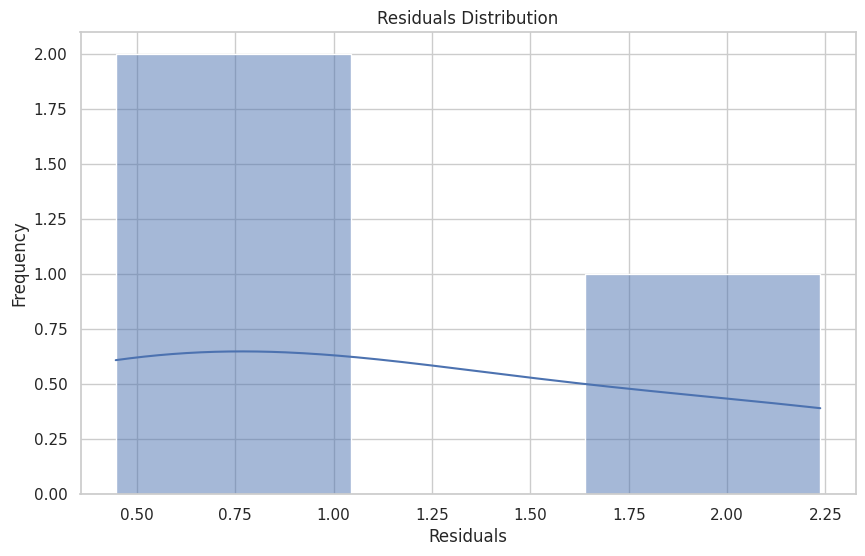

In [30]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [32]:
importances = model_rf.feature_importances_
feature_names = df_without_outliers.drop(['TAVG'],axis=1).columns
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


Feature importances:
TAVG_B: 0.14108418665528893
TMAX_C: 0.1383352950575525
TMAX_B: 0.1296809001367648
TAVG_C: 0.12235317814582292
TMIN_B: 0.11878303380937559
TMIN_A: 0.11091160364614808
TMIN_C: 0.10019397277295078
TMAX_A: 0.08874333664400197
TAVG_A: 0.0499144931320944
SNWD_C: 0.0
PRCP_C: 0.0
SNWD_B: 0.0
PRCP_B: 0.0
SNWD_A: 0.0
PRCP_A: 0.0


In [34]:
important_features = df_without_outliers.drop(['TAVG'],axis=1).columns[model_rf.feature_importances_ > 0]
X_reduced = df_without_outliers.drop(['TAVG'],axis=1)[important_features]

In [36]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, df_without_outliers['TAVG'], test_size=0.2, random_state=42)


model_rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_reduced.fit(X_train_reduced, y_train)

y_pred_rf_reduced = model_rf_reduced.predict(X_test_reduced)
mse_rf_reduced = mean_squared_error(y_test, y_pred_rf_reduced)
r2_rf_reduced = r2_score(y_test, y_pred_rf_reduced)

print(f"Reduced Features Random Forest Regressor Mean Squared Error: {mse_rf_reduced}")
print(f"Reduced Features Random Forest Regressor R^2 Score: {r2_rf_reduced}")

Reduced Features Random Forest Regressor Mean Squared Error: 2.6379286666666544
Reduced Features Random Forest Regressor R^2 Score: 0.7291654346338137


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_rf_reduced, X_reduced,df_without_outliers['TAVG'], cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")

Cross-validated MSE: 25.810967433333314


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R^2 Score: {r2_best}")
print(f"Best Parameters: {best_params}")

Best Model Mean Squared Error: 1.9690019999999635
Best Model R^2 Score: 0.7978437371663282
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
